<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import gpxpy

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.basemap import Basemap

import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False

In [66]:
## GPS轨迹文件
gpx_file = open('/Users/HYF/Downloads/0314sw.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
## 浓度文件
data = pd.ExcelFile('/Users/HYF/Downloads/ph_Conc.xlsx',)#encoding = 'utf-8') sep="\t", skiprows=(1,2)
data = data.parse(data.sheet_names[0])
data.Time = data.Time.astype(str)

In [67]:
data.head()

,Time,C2H2,C2H6,C3H6,C3H8,C4H8,C4H10,C5H8,C5H10,C5H12,...,C7H8,C7H14,C7H16,C8H8,C8H10,C8H18,C9H12,C9H20,C10H14,C10H22
0,10:05:00,2.030834,2.146866,0.104879,0.140472,0.161015,0.315214,0.152379,0.077763,0.073650,...,0.649596,0.297571,0.270281,0.144795,0.348156,0.125465,0.383749,0.351499,0.438728,0.661756
1,10:17:00,3.630834,3.146866,0.104879,0.140472,0.161015,0.315214,0.152379,0.077763,0.073650,...,0.649596,0.297571,0.270281,0.144795,0.348156,0.125465,0.383749,0.351499,0.438728,0.661756
2,10:29:00,2.926479,3.118184,0.454588,0.530570,0.306645,0.698185,0.063909,0.176314,0.278626,...,0.729379,0.268972,0.301978,0.144795,0.357792,0.102503,0.385541,0.364041,0.405361,0.156568
3,10:42:00,2.607842,2.171676,0.631107,0.466769,0.389863,0.791529,0.226103,0.211644,0.322213,...,0.663646,0.669355,0.333676,0.147476,0.361277,0.125465,0.393305,0.364041,0.410922,0.459681
4,10:55:00,8.376847,4.494923,0.780983,0.495935,0.415047,0.699930,0.363723,0.215363,0.324569,...,0.597913,0.326169,0.012176,0.126028,0.339340,0.125465,0.407639,0.346124,0.438728,0.661756


In [68]:
### 轨迹文件预处理
route = {'lat':[], 'lon':[], 'time':[]}
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route['lat'].append(point.latitude)
            route['lon'].append(point.longitude)
            route['time'].append(point.time)
df = pd.DataFrame(route)            
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df.time = df.time.astype(str)
df      = df.reset_index() 
data    = data.reset_index()

In [69]:
df.tail()

,index,lat,lon,time
7662,7662,39.99338,116.308762,2018-03-14 12:13:34
7663,7663,39.99338,116.308762,2018-03-14 12:13:35
7664,7664,39.99338,116.308762,2018-03-14 12:13:36
7665,7665,39.99338,116.308762,2018-03-14 12:13:36
7666,7666,39.99338,116.308762,2018-03-14 12:13:36


In [70]:
data.tail()

,index,Time,C2H2,C2H6,C3H6,C3H8,C4H8,C4H10,C5H8,C5H10,...,C7H8,C7H14,C7H16,C8H8,C8H10,C8H18,C9H12,C9H20,C10H14,C10H22
4,4,10:55:00,8.376847,4.494923,0.780983,0.495935,0.415047,0.699930,0.363723,0.215363,...,0.597913,0.326169,0.012176,0.126028,0.339340,0.125465,0.407639,0.346124,0.438728,0.661756
5,5,11:08:00,5.475574,2.601907,0.114871,0.421197,0.222333,0.550755,0.231018,0.150282,...,0.812675,0.354768,0.501218,0.190373,0.375628,0.125465,0.430333,0.349110,0.455411,0.459681
6,6,11:37:00,3.345738,2.429815,1.154005,1.004521,0.774196,1.239056,0.521002,0.423623,...,0.985288,1.026840,0.582725,0.262761,0.406790,0.171389,0.430333,0.350902,0.533267,0.358643
7,7,11:57:00,7.672492,4.695698,1.257252,0.977177,0.750107,1.061092,0.501342,0.328790,...,0.750454,0.697954,0.446880,0.142114,0.371528,0.148427,0.402861,0.349110,0.444289,0.560719
8,8,12:13:00,2.926479,3.118184,0.454588,0.530570,0.306645,0.698185,0.063909,0.176314,...,0.729379,0.268972,0.301978,0.144795,0.357792,0.102503,0.385541,0.364041,0.405361,0.156568


In [71]:
### 利用“时间”对应轨迹和测试浓度
for col in data.columns[1:]:
    df[col] = np.nan
k = []
for j in range(len(data)):
    k.append(df.loc[df['time'].astype(str).str[11:16] == data.Time.iloc[j][:-3]].index[0])
for i in range(len(k)):
    for col in data.columns[1:]:
        df[col].iloc[k[i]:] = data[col].iloc[i]
#     if i == (len(k)-1):
#         df[col].iloc[k[i]:] = data[col].iloc[i]
df = df[np.isfinite(df['C2H2'])]
df = df.reset_index()
print "DONE"

DONE


In [72]:
### 以绘制C2H2 为例子

#### 输入变量
start     =  0
end       =  -1
species   =  'C2H2'
x,y,z = df['lon'].iloc[start:end],df['lat'].iloc[start:end],df[species].iloc[start:end],
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

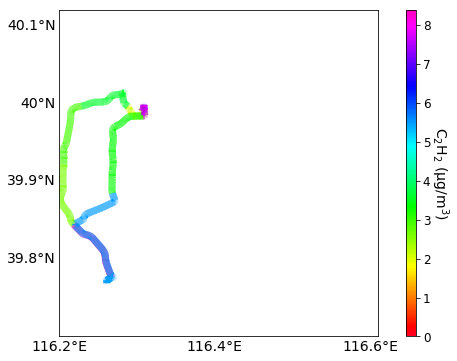

In [73]:
xc1,xc2,yc1,yc2 = 116.2,116.61, 39.70,40.12
fig=plt.figure(figsize=(8,6))
ax=plt.subplot()
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
# map.readshapefile('/Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/Beijing-shp/shape/roads',
#                   'roads',zorder =1,color='grey')

map.drawparallels(np.arange(39.8,40.1,0.1), labels=[1, 0, 0, 0],linewidth =0, fontsize = 14)
map.drawmeridians(np.arange(116.2, 116.85, 0.2), labels=[0, 0, 0, 1], linewidth =0,fontsize = 14)


lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
                    norm=plt.Normalize(0, z.max()))
lc.set_array(z)
lc.set_linewidth(7)
kk = ax.add_collection(lc)
kk.zorder = 2


# ## 站点绘制
# site = plt.scatter(site_lon, site_lat,zorder = 3, color = '#C25247',marker = '*', s = 140)
# for i in range(0,len(site_lon),1):
#     plt.text(site_lon[i]+0.005, site_lat[i]+0.005, site_label[i],fontsize=12,fontweight='bold',
#                     ha='left',va='bottom',color='k')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.4)
cbar = plt.colorbar(kk, cax=cax)  
cbar.ax.tick_params(labelsize = 12)
cbar.ax.set_ylabel( r'$\mathregular{C_2H_2\ (\mu g/m^3)}$', rotation=270,labelpad = 20.0,fontsize = 14)

# output ="/Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/" +species
# plt.savefig(output+'.pdf')
plt.show()